<a href="https://colab.research.google.com/github/ahan-2000/OCELET-2023/blob/main/Semantic_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Mon Jun 12 14:56:26 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

!unzip "/content/drive/MyDrive/ocelot_img-20230611T002317Z-001.zip" -d "/content/sa_rest"

unzip:  cannot find or open /content/drive/MyDrive/ocelot_img-20230611T002317Z-001.zip, /content/drive/MyDrive/ocelot_img-20230611T002317Z-001.zip.zip or /content/drive/MyDrive/ocelot_img-20230611T002317Z-001.zip.ZIP.


In [ ]:
import json
with open('/content/drive/MyDrive/ocelot12023/ocelot2023_v0.1.2/metadata.json') as file:
    data = json.load(file)


In [ ]:
data

{'general_info': {'description': 'The OCELOT 2023 dataset is a histopathology dataset designed to facilitate the development of methods that utilize cell and tissue relationships. The dataset comprises both small and large field-of-view (FoV) patches extracted from digitally scanned whole slide images (WSIs), with overlapping regions. The small and large FoV patches are accompanied by annotations of cells and tissues, respectively. The WSIs are sourced from the publicly available TCGA database and were stained using the H&E method before being scanned with an Aperio scanner.',
  'url': 'https://lunit-io.github.io/research/ocelot_dataset/',
  'version': '0.1.2',
  'version_log': 'Modify coordinates of cell labels to range from 0 to 1023 (-1 from previous coordinates)',
  'year': '2023',
  'organization': 'Lunit Inc.',
  'license': 'Creative Commons Attribution-NonCommercial 4.0 International License (CC BY-NC 4.0). You are permitted to utilize any of the material in your own research, p

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt



In [ ]:
img=cv2.imread("/content/drive/MyDrive/sa_rest/images/001.png")
ann=cv2.imread("/content/drive/MyDrive/sa_rest/masks/001.png")

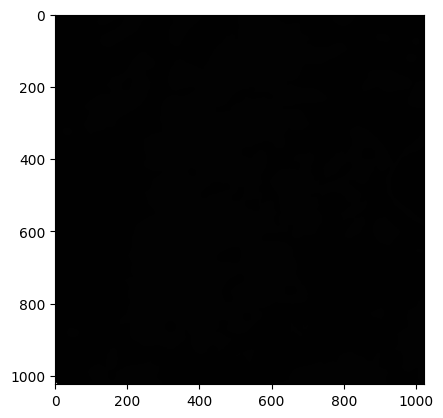

In [ ]:
plt.imshow(ann)

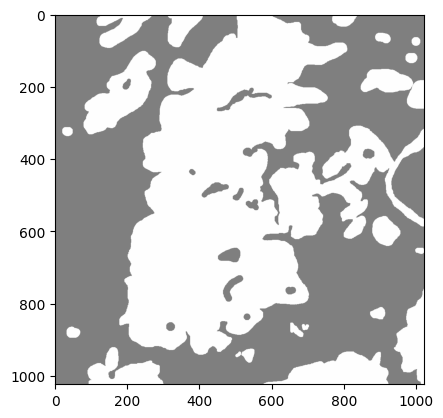

In [ ]:
plt.imshow(ann*127)

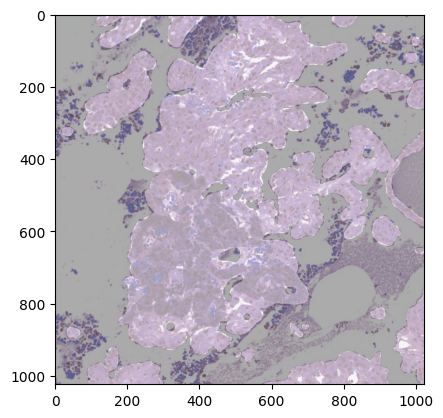

In [ ]:
# Perform weighted addition
weighted_sum = cv2.addWeighted(img, 0.4, ann*127, 0.6, 0)
plt.imshow(weighted_sum )

In [ ]:
!git clone https://github.com/facebookresearch/segment-anything.git
!cd segment-anything; pip install -e .

Cloning into 'segment-anything'...
remote: Enumerating objects: 295, done.
remote: Total 295 (delta 0), reused 0 (delta 0), pack-reused 295
Receiving objects: 100% (295/295), 18.31 MiB | 16.32 MiB/s, done.
Resolving deltas: 100% (156/156), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/segment-anything
  Preparing metadata (setup.py) ... done
  Running setup.py develop for segment-anything


In [ ]:
!git clone https://github.com/yzluka/ritm_interactive_segmentation

Cloning into 'ritm_interactive_segmentation'...
remote: Enumerating objects: 178, done.
remote: Counting objects: 100% (108/108), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 178 (delta 50), reused 45 (delta 40), pack-reused 70
Receiving objects: 100% (178/178), 5.81 MiB | 13.59 MiB/s, done.
Resolving deltas: 100% (52/52), done.


In [ ]:
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

--2023-06-12 15:10:03--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 52.84.251.27, 52.84.251.106, 52.84.251.114, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|52.84.251.27|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘sam_vit_h_4b8939.pth’

sam_vit_h_4b8939.pt 100%[===================>]   2.39G   109MB/s    in 22s     

2023-06-12 15:10:25 (110 MB/s) - ‘sam_vit_h_4b8939.pth’ saved [2564550879/2564550879]



In [ ]:
!git clone https://github.com/mazurowski-lab/segment-anything-medical-evaluation

Cloning into 'segment-anything-medical-evaluation'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 39 (delta 11), reused 11 (delta 3), pack-reused 0
Unpacking objects: 100% (39/39), 22.88 KiB | 2.29 MiB/s, done.


In [ ]:
import shutil

src= '/content/drive/MyDrive/sa_rest'
dest='/content/sa_rest'

shutil.copytree(src,dest)

'/content/sa_rest'

In [ ]:
!python3 /content/segment-anything-medical-evaluation/prompt_gen_and_exec_v2_allmode.py --class-type rest

Streaming output truncated to the last 5000 lines.
curr mask over all mask ratio 0.0003435835767050335
curr mask over all mask ratio 0.00017179178835251675
curr mask over all mask ratio 0.00017179178835251675
curr mask over all mask ratio 0.00017179178835251675
curr mask over all mask ratio 0.00017179178835251675
curr mask over all mask ratio 0.00017179178835251675
curr mask over all mask ratio 0.0005153753650575503
curr mask over all mask ratio 0.00017179178835251675
curr mask over all mask ratio 0.0003435835767050335
curr mask over all mask ratio 0.0005153753650575503
curr mask over all mask ratio 0.00017179178835251675
curr mask over all mask ratio 0.0015461260951726507
curr mask over all mask ratio 0.00017179178835251675
curr mask over all mask ratio 0.0003435835767050335
curr mask over all mask ratio 0.00017179178835251675
curr mask over all mask ratio 0.00017179178835251675
curr mask over all mask ratio 0.00017179178835251675
curr mask over all mask ratio 0.0005153753650575503
cu

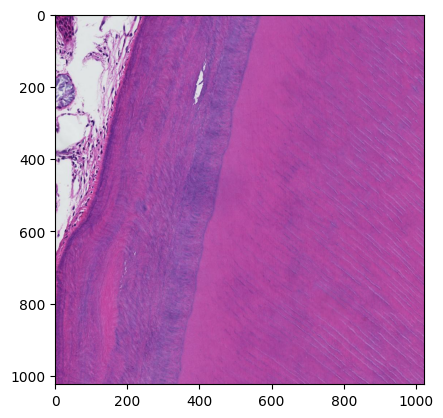

In [ ]:
from PIL import Image
test=Image.open("./sa_rest/images/388.png")
plt.imshow(test)

In [ ]:
from segment_anything import SamPredictor, sam_model_registry
from PIL import Image, ImageDraw, ImageOps
from shapely.geometry import LineString, MultiLineString, Polygon, Point, GeometryCollection
from skimage.morphology import medial_axis
from scipy.optimize import minimize_scalar
from scipy.ndimage import binary_dilation
from skimage.measure import label
from sklearn.cluster import KMeans

import argparse
import os
import cv2
import json
import imutils
import random
import matplotlib.pyplot as plt
import numpy as np
# Fix randomness in prompt selection
np.random.seed(1)

#This is a helper function that should not be called directly
def _find_closest(centroid, pos_points):
    dist_squared = np.sum((pos_points - centroid)**2, axis=1)
    point_idx = np.argmin(dist_squared)
    return pos_points[point_idx]

def IOU(pm, gt):
    a = np.sum(np.bitwise_and(pm, gt))
    b = np.sum(pm) + np.sum(gt) - a #+ 1e-8 
    if b == 0:
        return -1
    else:
        return a / b

def IOUMulti(y_pred, y):
    score = 0
    numLabels = np.max(y)
    if np.max(y) == 1:
        score = IOU(y_pred, y)
        return score
    else:
        count = 1
        for index in range(1,numLabels+1):
            curr_score = IOU(y_pred[y==index], y[y==index])
            print(index, curr_score)
            if curr_score != -1:
                score += curr_score
                count += 1
        return score / (count - 1) # taking average

####################################################
# input: raw_msk
#   A mask should containing no 'void' class. 
#   Binary mask should have value {0,1} but not {0,255}
# output:
#   A list of region profiles; Each profile takes the form
#   {'loc':[x0,y0,x1,y1], 'cls': cls}
#   'loc' is a list with 4 elements ; 'cls' is object class as integer 
####################################################
def MaskToBoxSimple(mask):
    mask = mask.squeeze()
    #find coordinates of points in the region
    row, col = np.argwhere(mask).T
    # find the four corner coordinates
    y0,x0 = row.min(),col.min()
    y1,x1 = row.max(),col.max()

    return [x0,y0,x1,y1]

if __name__ == '__main__': 
    parser = argparse.ArgumentParser(description="SAG segmentor for medical images")
    parser.add_argument("--num-prompt", default=1, type=int, help="number of prompts to include, negative number means using box as prompts")
    parser.add_argument("--class-type", default="b", type=str, help="binary or multi class, choose b or m")
    parser.add_argument("--model-path", default="./", type=str, help="the path of the model saved")
    parser.add_argument("--init-path", default="./", type=str, help="the path of the dataset")
    parser.add_argument("--model", default="sam", type=str, help="the model to use as predictor")
    parser.add_argument("--oracle", default=False, type=bool, help="whether eval in the oracle mode, where best prediction is selected based on GT")
    parser.add_argument("--result-image",default="./results",type=str, help="the path to save segmented results")
    parser.add_argument("--result-score",default="./scores",type=str, help="the path to save result metrics")
    args = parser.parse_args()
    
    # Set up model
    sam = sam_model_registry["default"](checkpoint=os.path.join(args.model_path, "sam_vit_h_4b8939.pth"))
    sam.to('cuda')
    predictor = SamPredictor(sam)

    # Set up dataset
    dataset = input("Type of input: ")
    if dataset == 'all':
        # all
        dataset_list = ['busi', 'breast_b', 'breast_d', 'chest', 'gmsc_sp', 'gmsc_gm', 'heart', 'liver', 'petwhole', 'prostate', 'brats_3m', 'xrayhip', 'rest'
                        'ctliver', 'ctorgan', 'ctcolon', 'cthepaticvessel', 'ctpancreas', 'ctspleen', 'usmuscle', 'usnerve', 'usovariantumor']
    else:
        dataset_list = [dataset]

    for dataset in dataset_list:
        num_class = 1
        if 'gmsc' in dataset:
            input_img_dir = os.path.join(args.init_path, 'sa_gmsc/images') 
            input_seg_dir = os.path.join(args.init_path, 'sa_gmsc/masks')
        elif 'breast' in dataset:
            input_img_dir = "../sa_dbc-2D/imgs"
            if dataset == 'breast_b':
                input_seg_dir = "../sa_dbc-2D/masks_breast"
            else:
                input_seg_dir = "../sa_dbc-2D/masks_dense-tissue"
        else:
            input_img_dir = os.path.join(args.init_path, 'sa_%s/images' % dataset)
            input_seg_dir = os.path.join(args.init_path, 'sa_%s/masks' % dataset)
            #input_img_dir='/content/sa_rest/images/'
        
        # Handle dataset with multi-class
        if dataset == 'brats_3m':
            num_class = 3
        if dataset == 'rest':
            num_class = 3
        if dataset == 'ctorgan':
            num_class = 5 

        # target is a variable only used by GMSC
        if dataset == 'gmsc_sp':
            target = 'sp'
        if dataset == 'gmsc_gm':
            target = 'gm'
        print(input_img_dir)
        print(input_seg_dir)

        # Running
        dc_log, names = [], []
        mask_list = os.listdir(input_seg_dir)
        print('# of dataset', len(mask_list))
        
        # VIS: now VIS function is separted into another file. Only provide mask if neede
        vis = False
        # Change to [name1, name2, ...] if only need to run on a few samples
        im_list = None#['CHNCXR_0061_0_mask.png'] 

        for im_idx, im_name in enumerate(mask_list):
            # Skip non-selected images if specified
            print(im_name)
            if im_list is not None:
                if im_name not in im_list:
                    continue

            # GMSC: All masks in the same dir, separated by names
            if 'gmsc' in dataset:
                if target not in im_name:
                    continue

            if 'DS_Store' in im_name:
                continue

            # Read image and mask
            try:
                input_mask = cv2.imread(os.path.join(input_seg_dir, im_name), 0)  
            except:
                print('Cannot read mask', im_name)
                continue
            if np.max(input_mask) == 0:
                print('Empty mask')
                print('*****')
                continue
            
            # In multi-class setting, we assume classes are labeled 0,1,2,3...
            # BraTS has label 1,2,4
            if 'brats' in dataset:
                input_mask[input_mask == 4] = 3
            
            # In binary-class setting, some masks are encoded as 0, 255
            if np.max(input_mask) == 255:
                input_mask = np.uint8(input_mask / input_mask.max())

            # Chest and GMSC: name inconsistentcy
            if 'chest' in dataset:
                im_name = im_name.replace('_mask', '')
            if 'gmsc' in dataset:
                im_name = im_name.replace('mask', 'image').replace(target+'-', '')
            try:
                path=os.path.join(input_img_dir, im_name)
                print(path)
                input_image = Image.open(path)
            except:
                print('Cannot read image', im_name)
                continue

            input_array = np.array(input_image)
            input_array = np.uint8(input_array / np.max(input_array) * 255)
            print('Number of labels', np.max(input_mask))
            print('Image maximum', np.max(input_array))
            
            # if we want to do multi-class classification
            # else, we combine all the masks as the same class
            #if args.class_type == 'm':
            if num_class > 1:
                #mask_one_hot = (np.arange(1, input_mask.max()+1) == input_mask[...,None]).astype(int) 
                mask_one_hot = (np.arange(1, num_class+1) == input_mask[...,None]).astype(int) 
            else: 
                mask_one_hot = np.array(input_mask > 0,dtype=int)
            
            if len(mask_one_hot.shape) < 3:
                mask_one_hot = mask_one_hot[:,:,np.newaxis] # height*depth*1, to consistent with multi-class setting
            
            # Start prediction for each class
            predictor.set_image(input_array)
            
            # Mask has to be float
            dc_class_tmp = []
            for cls in range(num_class):
                dc_prompt_tmp = []
                # Cls = 2 means to predict mask with label 3
                # But BraTS use 1,2,4 to label differet classes
                #if cls == 2 and 'brats' in dataset:
                #    cls += 1
                print('Predicting class %s' % cls)
                # segment current class as binary segmentation
                try:
                    mask_cls = np.uint8(mask_one_hot[:,:,cls])
                except:
                    print('Mask do not contain this class, skipped')
                    if num_class == 1:
                        dc_class_tmp.append(np.nan)
                    else:
                        # Fixed with 5 modes for now
                        dc_class_tmp.append([np.nan] * 5)
                    continue

                if np.sum(mask_cls) == 0:
                    print('Empty single cls, skipped')
                    #dc_class_tmp.append(np.nan)
                    if num_class == 1:
                        dc_class_tmp.append(np.nan)
                    else:
                        dc_class_tmp.append([np.nan] * 5)
                    continue
                
                # ------ Generate prompt by our definition -------- #
                preds_mask_full, prompts_full = [], []
                
                # Find all disconnected regions
                label_msk, region_ids = label(mask_cls, connectivity=2, return_num=True)
                print('num of regions found', region_ids)
                ratio_list, regionid_list = [], []
                for region_id in range(1, region_ids+1):
                    #find coordinates of points in the region
                    binary_msk = np.where(label_msk==region_id, 1, 0)

                    # clean some region that is abnormally small
                    r = np.sum(binary_msk) / np.sum(mask_cls)
                    print('curr mask over all mask ratio', r)
                    ratio_list.append(r)
                    regionid_list.append(region_id)

                ratio_list, regionid_list = zip(*sorted(zip(ratio_list, regionid_list)))
                regionid_list = regionid_list[::-1]

                # 5 modes for now
                for mode in range(5):
                    # Mode 0: middle point of LARGEST mask
                    if mode == 0:
                        binary_msk = np.where(label_msk==regionid_list[0], 1, 0)
                        # Calculates the distance to the closest zero pixel for each pixel of the source image.
                        # Ref from RITM: https://github.com/SamsungLabs/ritm_interactive_segmentation/blob/aa3bb52a77129e477599b5edfd041535bc67b259/isegm/data/points_sampler.py
                        # NOTE: numpy and opencv have inverse definition of row and column
                        # NOTE: SAM and opencv have the same definition
                        padded_mask = np.uint8(np.pad(binary_msk, ((1, 1), (1, 1)), 'constant'))
                        dist_img = cv2.distanceTransform(padded_mask, distanceType=cv2.DIST_L2, maskSize=5).astype(np.float32)[1:-1, 1:-1]
                        cY, cX = np.where(dist_img==dist_img.max())
                        random_idx = np.random.randint(0, len(cX))
                        cX, cY = int(cX[random_idx]), int(cY[random_idx])

                        prompt = [(cX,cY,1)]
                    # Mode 1: middle point of top-3 LARGEST mask
                    if mode == 1:
                        prompt = []
                        for mask_idx in range(3):
                            if mask_idx < len(regionid_list):
                                binary_msk = np.where(label_msk==regionid_list[mask_idx], 1, 0) 
                                padded_mask = np.uint8(np.pad(binary_msk, ((1, 1), (1, 1)), 'constant'))
                                dist_img = cv2.distanceTransform(padded_mask, distanceType=cv2.DIST_L2, maskSize=5).astype(np.float32)[1:-1, 1:-1]
                                cY, cX = np.where(dist_img==dist_img.max())
                                random_idx = np.random.randint(0, len(cX))
                                cX, cY = int(cX[random_idx]), int(cY[random_idx])
                                
                                prompt.append((cX,cY,1))
                    # Mode 2: box of LARGEST mask
                    if mode == 2:
                        binary_msk = np.where(label_msk==regionid_list[0], 1, 0)
                        box = MaskToBoxSimple(binary_msk)
                        prompt = box
                    # Mode 3: box of top-3 LARGEST mask
                    if mode == 3:
                        prompt = []
                        for mask_idx in range(3):
                            if mask_idx < len(regionid_list):
                                binary_msk = np.where(label_msk==regionid_list[mask_idx], 1, 0)
                                box = MaskToBoxSimple(binary_msk)
                                prompt.append(box)
                    # Mode 4: box of ENTIRE mask
                    if mode == 4:
                        box = MaskToBoxSimple(mask_cls)
                        prompt = box

                    # Get output based on prompt type
                    prompt = np.array(prompt)
                    print('mode %s: prompt: %s' % (mode, prompt))
                    if prompt.shape[-1] == 3:
                        pc = prompt[:,:2]
                        pl = prompt[:, -1]
                        preds, _, _ = predictor.predict(point_coords=pc, point_labels=pl)
                    elif prompt.shape[-1] == 4:
                        if len(prompt.shape) == 1:
                            preds, _, _ = predictor.predict(box=prompt)
                        else:
                            preds = None
                            for box in prompt:
                                preds_single, _, _ = predictor.predict(box=box)
                                if preds is None:
                                    preds = preds_single
                                else:
                                    preds += preds_single

                    preds = preds.transpose((1,2,0))
                    if args.oracle:
                        max_slice, max_dc = -1, 0
                        for mask_slice in range(preds.shape[-1]):
                            preds_mask_single = np.array(preds[:,:,mask_slice]>0,dtype=int)
                            dc = IOUMulti(preds_mask_single, mask_cls)
                            if dc > max_dc:
                                max_dc = dc
                                max_slice = mask_slice
                            print(mask_slice, dc)
                        preds_mask_single = np.array(preds[:,:,max_slice]>0,dtype=int)
                    else:
                        preds_mask_single = np.array(preds[:,:,0]>0,dtype=int)

                    dc = IOUMulti(preds_mask_single, mask_cls)
                    dc_prompt_tmp.append(dc)
                    print('IoU:', dc)
                    
                    # Track prediction, only used when vis
                    if vis:
                        preds_mask_full.append(np.expand_dims(preds, 0))
                        prompts_full.append(prompt)

                # assgin final mask for this class to it
                dc_class_tmp.append(dc_prompt_tmp)
            
            dc_log.append(dc_class_tmp)
            names.append(im_name)
            print('****')
            
            # VIS mode only saves mask and prompt information
            if vis:
                # Final shape: N*H*W*3
                # N = number of predictions. 1 if box prompt, otherwise number of prompts
                # H,W = size of mask
                # 3 = number of outputs per prediction. SAM returns 3 outpus per prompt. 
                #     If no oracle mode, select 0
                #     If oracle mode, select maximum slice. 
                #     You can do that later, or use variable "max_slice"
                preds_mask_full = np.concatenate(preds_mask_full)

                # If box:    N*4, N=number of boxes, 4=box coordinate in XYXY format
                # If prompts:N*3, N=number of prmts, 3=cX, cY, pos/neg
                prompts_full = np.array(prompts_full)
                print(preds_mask_full.shape)
                # TODO: replace with desired storage place
                np.save('tmp/%s_pred.npy' % im_name[:-4], preds_mask_full)
                np.save('tmp/%s_prompt.npy' % im_name[:-4], prompts_full)

        if not vis:
            # BRATS labelled class as 1,2,4
            dc_log = np.array(dc_log)
            print(dc_log.shape)
            print(np.nanmean(dc_log, axis=0))
            print(np.nanmean(dc_log))

            version = 'sam_diffmode'
            if args.oracle:
                version += '_oracle'

            json.dump(names, open('/content/drive/MyDrive/sa_rest/%s_binary_names_%s.json' % (version, dataset), 'w+'))
            np.save('/content/drive/MyDrive/sa_rest/%s_binary_score_%s.npy' % (version, dataset), dc_log)



In [ ]:
import numpy as np
test=np.load('/content/drive/MyDrive/sa_rest/sam_diffmode_binary_score_rest.npy')

In [ ]:
test

array([[[0.04515641, 0.00086667, 0.26682692, 0.34090909, 0.00085715],
        [       nan,        nan,        nan,        nan,        nan],
        [       nan,        nan,        nan,        nan,        nan]],

       [[0.04697987, 0.00819788, 0.04615385, 0.12903226, 0.00076246],
        [       nan,        nan,        nan,        nan,        nan],
        [       nan,        nan,        nan,        nan,        nan]],

       [[0.00265604, 0.00265604, 0.27272727, 0.27272727, 0.27272727],
        [       nan,        nan,        nan,        nan,        nan],
        [       nan,        nan,        nan,        nan,        nan]],

       ...,

       [[0.00429118, 0.228524  , 0.23187371, 0.23216457, 0.58953243],
        [       nan,        nan,        nan,        nan,        nan],
        [       nan,        nan,        nan,        nan,        nan]],

       [[0.00917372, 0.00473077, 0.01364234, 0.03007834, 0.00488837],
        [       nan,        nan,        nan,        nan,        nan],